In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import fdasrsf as fs
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [52]:
df_curl = pd.read_csv('vpc_curl.csv')

In [44]:
ys = np.loadtxt('ys_curl_wodelta.txt')
pids = np.loadtxt('pids_curl_wodelta.txt')
visits = np.loadtxt('visits_curl_wodelta.txt', dtype=str)

ys = np.array(ys)
ys.shape

(35, 800)

In [45]:
time = np.array(range(800)).astype(float)
obj = fs.fdawarp(np.transpose(ys), time)

""" Calculate healthy mean"""
obj.srsf_align(parallel=True)

Initializing...
Compute Karcher Mean of 35 function in SRSF space with lam=0.000000
updating step: r=1
updating step: r=2
updating step: r=3
updating step: r=4
updating step: r=5
updating step: r=6
updating step: r=7
updating step: r=8
updating step: r=9
updating step: r=10
updating step: r=11
updating step: r=12
updating step: r=13
updating step: r=14
updating step: r=15
updating step: r=16
updating step: r=17
updating step: r=18
updating step: r=19
updating step: r=20
maximal number of iterations is reached


<Figure size 3000x300 with 0 Axes>

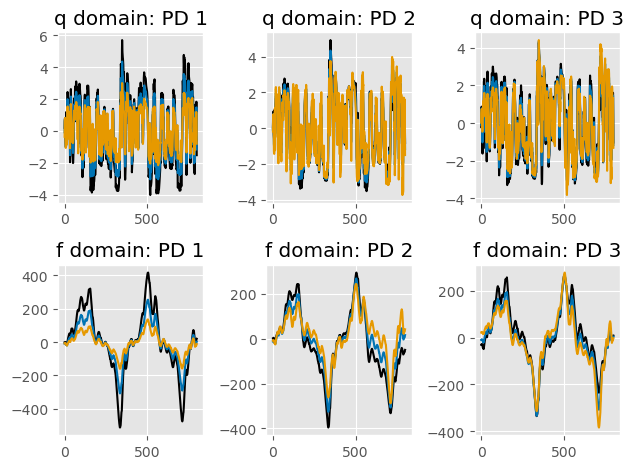

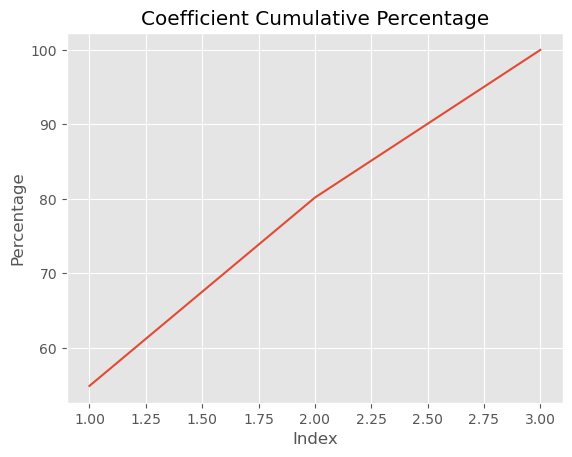

,vpc1,vpc2,vpc3,pids,visits
0,7.985218,-7.476264,0.956126,1.0,03-26-21
1,1.187214,-7.899718,-1.404926,1.0,07-08-21
2,17.594725,2.363707,2.688434,2.0,02-11-21
3,-10.490809,14.639259,-0.717701,3.0,02-24-21
4,-8.060800,-0.406609,-6.880753,3.0,07-20-21
5,30.821157,5.769619,-0.357360,5.0,03-11-21
6,9.378946,2.732953,-5.886583,8.0,04-21-21
7,-17.152663,23.681115,36.049781,9.0,09-22-21
8,-1.474243,32.059155,-29.461902,10.0,03-24-21
9,-16.210607,-11.518109,-8.016074,11.0,03-24-21


In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 3))
vpca = fs.fdavpca(obj)
vpca.calc_fpca(no=3)
vpca.plot()

vpca_df = pd.DataFrame(vpca.coef, columns=['vpc1', 'vpc2', 'vpc3'])
df_processor = vpca_df
df_processor['pids'] = pids
df_processor['visits'] = visits
df_processor

In [47]:
baseline_df = pd.read_csv('/mnt/sdb/arafat/U-Extend/paper_data/final_clinical_df.csv')
df_processor['visits'] = pd.to_datetime(df_processor['visits'])
df_processor['visits'] = df_processor['visits'].apply(lambda x: x.strftime('%Y-%m-%d'))
df_processor['visits'] = pd.to_datetime(df_processor['visits'], format = "%Y-%m-%d")

baseline_df['Sensor Data Date'] = pd.to_datetime(baseline_df['Sensor Data Date'], format = "%Y-%m-%d")
df_curl = pd.merge(df_processor, baseline_df, left_on=['pids','visits'], right_on=['PID','Sensor Data Date'], how='inner')

In [53]:
mixed_effect_df = df_curl[['PID','Age','vpc1','vpc2','Cohort','visits']]

# Define a dictionary to control the sort order
sort_order = {'Healthy': 1, 'DMD': 2, 'SMA': 3}

# Apply sort by transforming 'Cohort' into categorical type with specified order
mixed_effect_df['Cohort'] = pd.Categorical(mixed_effect_df['Cohort'], categories=['Healthy', 'DMD', 'SMA'], ordered=True)

# Sort the DataFrame
mixed_effect_df = mixed_effect_df.sort_values('Cohort')

# Adjust age
# mixed_effect_df['days'] = mixed_effect_df.groupby('PID')['visits'].transform(lambda x: (x - x.min()).dt.days)
# mixed_effect_df['Age'] = mixed_effect_df['Age'] + (mixed_effect_df['days']/365)
mixed_effect_df

,PID,Age,vpc1,vpc2,Cohort,visits
15,21.0,35.0,4.035354,-9.643819,Healthy,2021-06-16
4,8.0,6.0,10.082425,1.086304,Healthy,2021-04-21
24,35.0,13.0,3.076309,-0.795305,Healthy,2021-07-27
23,33.0,3.0,-5.952060,-5.642357,Healthy,2021-07-15
21,28.0,12.0,-4.266452,-9.181239,Healthy,2021-06-23
18,25.0,9.0,12.362032,-7.371377,Healthy,2021-06-16
17,24.0,16.0,7.643633,-5.634325,Healthy,2021-06-16
16,22.0,17.0,3.704989,-0.912366,Healthy,2021-06-16
14,19.0,32.0,2.433049,-11.927070,Healthy,2021-05-14
27,38.0,25.0,24.456791,-4.688138,DMD,2021-08-25


In [8]:
# Define PIDs and the Visit #'s to delete
# deletions = {
#     1: 1,  # Delete Visit #1 for PID 1
#     11: 2  # Delete Visit #2 for PID 11
# }

# # Perform deletion
# for pid, visit_number in deletions.items():
#     mixed_effect_df = mixed_effect_df.drop(mixed_effect_df[(mixed_effect_df['PID'] == pid) & (mixed_effect_df['Visit #'] == visit_number)].index)

# # Reset index after drop
# mixed_effect_df.reset_index(drop=True, inplace=True)
# mixed_effect_df

In [9]:
# mixed_effect_df.to_csv('vpc_curl_mv.csv', index=False)

<Axes: xlabel='Cohort', ylabel='vpc2'>

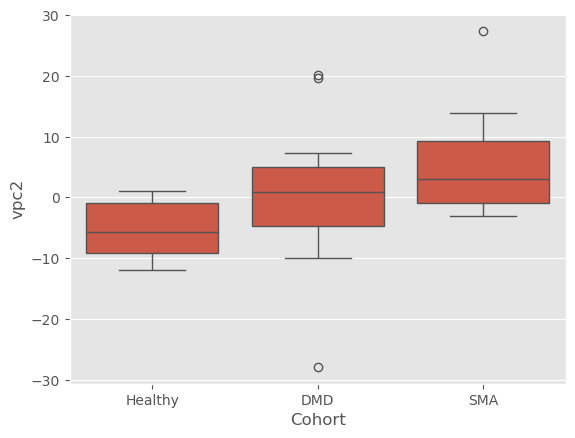

In [54]:
sns.boxplot(data=mixed_effect_df, x='Cohort', y='vpc2')

In [55]:
import scipy.stats as stats
import statsmodels.stats.multitest as smm

group_DMD = mixed_effect_df[mixed_effect_df['Cohort'] == 'DMD']['vpc2']
group_SMA = mixed_effect_df[mixed_effect_df['Cohort'] == 'SMA']['vpc2']
group_Healthy = mixed_effect_df[mixed_effect_df['Cohort'] == 'Healthy']['vpc2']

# Perform pairwise t-tests
t_stat_DMD_SMA, p_val_DMD_SMA = stats.ttest_ind(group_DMD, group_SMA)
t_stat_DMD_Healthy, p_val_DMD_Healthy = stats.ttest_ind(group_DMD, group_Healthy)
t_stat_SMA_Healthy, p_val_SMA_Healthy = stats.ttest_ind(group_SMA, group_Healthy)

# Collect p-values
p_values = [p_val_DMD_SMA, p_val_DMD_Healthy, p_val_SMA_Healthy]

# Apply Benjamini-Hochberg correction
reject, pvals_corrected, _, _ = smm.multipletests(p_values, alpha=0.05, method='fdr_bh')

# Create a summary DataFrame for the results
summary_df = pd.DataFrame({
    'p_value': p_values,
    'p_value_corrected': pvals_corrected,
    'reject_null': reject
})

summary_df.index = ['DMD vs SMA', 'DMD vs Healthy', 'SMA vs Healthy']
summary_df

,p_value,p_value_corrected,reject_null
DMD vs SMA,0.268623,0.268623,False
DMD vs Healthy,0.159069,0.238604,False
SMA vs Healthy,0.009916,0.029749,True


In [66]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit a mixed-effects model
# model = smf.mixedlm('vpc1 ~ Age * Cohort', mixed_effect_df, groups=mixed_effect_df['PID'])

# Fit a linear model
model = smf.ols('vpc1 ~ Age * Cohort', data=mixed_effect_df)
result1 = model.fit()

# Display the results
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                   vpc1   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     7.186
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           0.000273
Time:                        09:22:16   Log-Likelihood:                -115.76
No. Observations:                  31   AIC:                             243.5
Df Residuals:                      25   BIC:                             252.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.3353      6.89

In [26]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit a mixed-effects model
model = smf.mixedlm('vpc2 ~ Age * Cohort', mixed_effect_df, groups=mixed_effect_df['PID'])
# model = smf.ols('vpc2 ~ Cohort', data=mixed_effect_df)
result2 = model.fit()

# Display the results
print(result2.summary())

            Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   vpc2     
No. Observations:   35        Method:               REML     
No. Groups:         31        Scale:                73.3459  
Min. group size:    1         Log-Likelihood:       -121.9029
Max. group size:    2         Converged:            Yes      
Mean group size:    1.1                                      
-------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-------------------------------------------------------------
Intercept         -0.737    6.286 -0.117 0.907 -13.056 11.583
Cohort[T.DMD]     -1.454    7.808 -0.186 0.852 -16.758 13.851
Cohort[T.SMA]     16.491    9.297  1.774 0.076  -1.730 34.713
Age               -0.288    0.332 -0.867 0.386  -0.938  0.362
Age:Cohort[T.DMD]  0.448    0.434  1.032 0.302  -0.403  1.299
Age:Cohort[T.SMA] -0.690    0.705 -0.979 0.328  -2.073  0.692
Group Var         32

In [14]:
# Convert the summary to LaTeX
# latex_summary = result2.summary().as_latex()
# print(latex_summary)

In [28]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multitest import multipletests

# Example data
# data should be your DataFrame with columns: response, age, cohort, and group

# Fit the mixed-effects model
model_vpc1 = smf.mixedlm("vpc1 ~ Age * Cohort", mixed_effect_df, groups=mixed_effect_df["PID"])
# model_vpc1 = smf.ols('vpc1 ~ Age * Cohort', data=mixed_effect_df)
result_vpc1 = model_vpc1.fit()

model_vpc2 = smf.mixedlm("vpc2 ~ Age * Cohort", mixed_effect_df, groups=mixed_effect_df["PID"])
# model_vpc2 = smf.ols('vpc2 ~ Cohort', data=mixed_effect_df)
result_vpc2 = model_vpc2.fit()

# Extract p-values
p_values_vpc1 = result_vpc1.pvalues
p_values_vpc2 = result_vpc2.pvalues
# p_values_vpc2 = summary_df['p_value']

# Combine p-values
combined_p_values = p_values_vpc1.tolist() + p_values_vpc2.tolist()

# Apply Benjamini-Hochberg correction
corrected_p_values = multipletests(combined_p_values, alpha=0.05, method='fdr_bh')[1]

# Create a dictionary to map back to the original p-values with unique keys
corrected_p_dict = {f'vpc1_{k}': v for k, v in zip(p_values_vpc1.index.tolist(), corrected_p_values[:len(p_values_vpc1)])}
corrected_p_dict.update({f'vpc2_{k}': v for k, v in zip(p_values_vpc2.index.tolist(), corrected_p_values[len(p_values_vpc1):])})

corrected_p_dict

{'vpc1_Intercept': 0.9066982530622427,
 'vpc1_Cohort[T.DMD]': 0.05447400606896288,
 'vpc1_Cohort[T.SMA]': 0.04133052611089188,
 'vpc1_Age': 0.9066982530622427,
 'vpc1_Age:Cohort[T.DMD]': 0.03951258705480784,
 'vpc1_Age:Cohort[T.SMA]': 0.03951258705480784,
 'vpc1_Group Var': 0.514841933081214,
 'vpc2_Intercept': 0.9066982530622427,
 'vpc2_Cohort[T.DMD]': 0.9066982530622427,
 'vpc2_Cohort[T.SMA]': 0.2130478126575991,
 'vpc2_Age': 0.6001817096031625,
 'vpc2_Age:Cohort[T.DMD]': 0.5731661460481882,
 'vpc2_Age:Cohort[T.SMA]': 0.5731661460481882,
 'vpc2_Group Var': 0.9066982530622427}